In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [5]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0,-4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [6]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

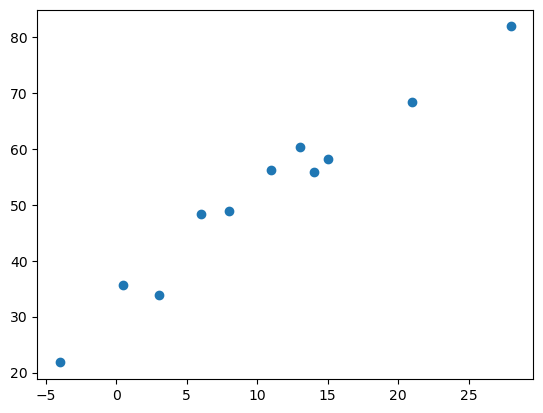

In [8]:
# plot a graph
plt.scatter(t_c, t_u)

In [10]:
# model
def model(t_u, w, b):
    return w * t_u + b

In [17]:
# loss function
def loss_fn(t_p, t_c):
    sq_err = (t_p - t_c) ** 2
    return sq_err.mean()

In [12]:
# Initialize the parameters
w = torch.ones(())
b = torch.zeros(())

In [13]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [18]:
# calculate loss
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [21]:
# derivation of loss
delta = 0.1

loss_rate_of_change_w =(loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [22]:
learning_rate = 1e-2
w = w-learning_rate * loss_rate_of_change_w

In [23]:
# derivate of loss & gradient for `b`

loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

Computing derivaties

In [25]:
def dloss_fn(t_p, t_c):
    diffs = 2 * (t_p - t_c) / t_p.size(0)
    return diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

Defining Gradient function

In [32]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

The training loop

In [40]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w, b = params
        
        # forward pass
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        
        # backward pass
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        if epoch % 100 == 0:
            print(f"Epoch : {epoch}, loss: {loss:.2f}")

    return params

In [41]:
training_loop(
 n_epochs = 100,
 learning_rate = 1e-4,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_u,
 t_c = t_c)

Epoch : 100, loss: 29.02


tensor([ 0.2327, -0.0438])

Normalize the data

In [36]:
t_un = 0.1 * t_u

In [46]:
params = training_loop(
 n_epochs = 5000, 
 learning_rate = 1e-2,
 params = torch.tensor([1.0, 0.0]),
 t_u = t_un, # passing normalize data
 t_c = t_c)

Epoch : 100, loss: 22.15
Epoch : 200, loss: 16.61
Epoch : 300, loss: 12.66
Epoch : 400, loss: 9.86
Epoch : 500, loss: 7.86
Epoch : 600, loss: 6.44
Epoch : 700, loss: 5.43
Epoch : 800, loss: 4.71
Epoch : 900, loss: 4.19
Epoch : 1000, loss: 3.83
Epoch : 1100, loss: 3.57
Epoch : 1200, loss: 3.38
Epoch : 1300, loss: 3.25
Epoch : 1400, loss: 3.16
Epoch : 1500, loss: 3.09
Epoch : 1600, loss: 3.04
Epoch : 1700, loss: 3.01
Epoch : 1800, loss: 2.99
Epoch : 1900, loss: 2.97
Epoch : 2000, loss: 2.96
Epoch : 2100, loss: 2.95
Epoch : 2200, loss: 2.94
Epoch : 2300, loss: 2.94
Epoch : 2400, loss: 2.94
Epoch : 2500, loss: 2.93
Epoch : 2600, loss: 2.93
Epoch : 2700, loss: 2.93
Epoch : 2800, loss: 2.93
Epoch : 2900, loss: 2.93
Epoch : 3000, loss: 2.93
Epoch : 3100, loss: 2.93
Epoch : 3200, loss: 2.93
Epoch : 3300, loss: 2.93
Epoch : 3400, loss: 2.93
Epoch : 3500, loss: 2.93
Epoch : 3600, loss: 2.93
Epoch : 3700, loss: 2.93
Epoch : 3800, loss: 2.93
Epoch : 3900, loss: 2.93
Epoch : 4000, loss: 2.93
Epoch 

Predict

In [47]:
t_p = model(t_un, *params)

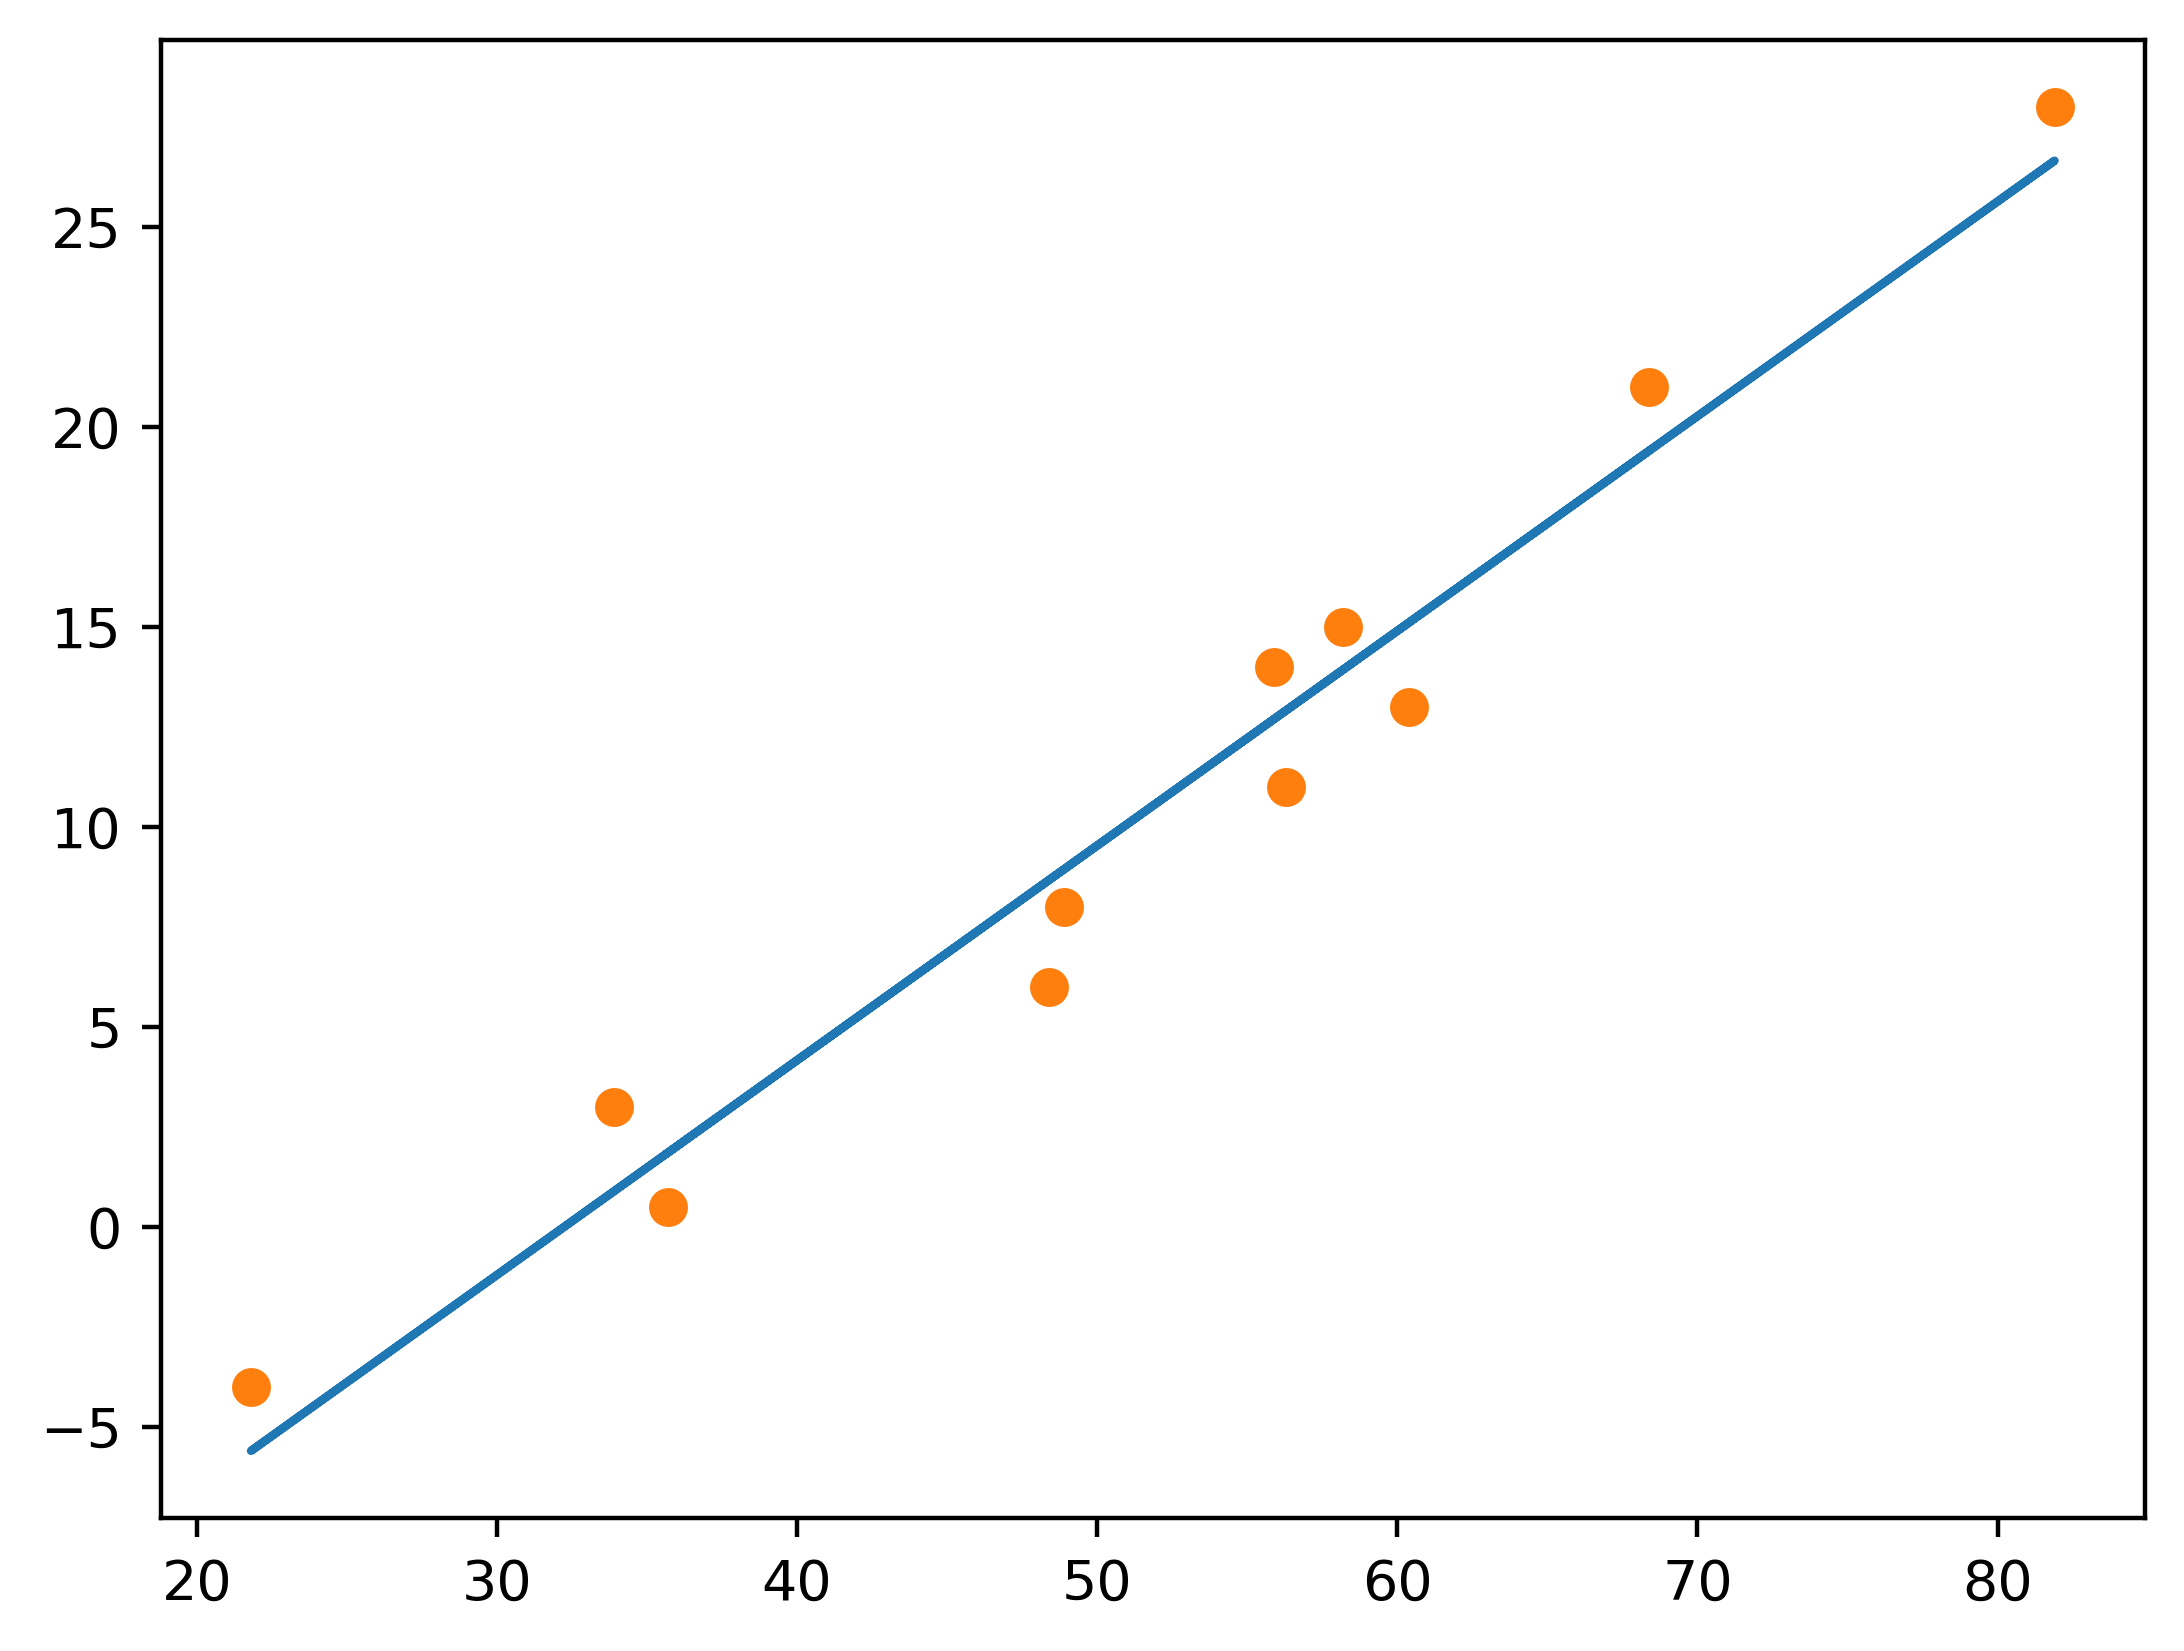

In [54]:
# plot graph
fig = plt.figure(dpi=400)
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

Accuracy